In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Importing the dataset
dataset = pd.read_csv('../data/Position_Salaries.csv')


In [3]:
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [6]:
X = dataset.loc[:, 'Level'].values.reshape(-1, 1)
y = dataset.loc[:, 'Salary'].values


In [20]:
# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(n_estimators=300,
                                  criterion='mse',
                                  max_depth=None,
                                  min_samples_split=2,
                                  min_samples_leaf=1,
                                  min_weight_fraction_leaf=0.0,
                                  max_features='auto',
                                  max_leaf_nodes=None,
                                  min_impurity_decrease=0.0,
                                  min_impurity_split=None,
                                  bootstrap=True,
                                  oob_score=False,
                                  n_jobs=None,
                                  random_state=0,
                                  verbose=0,
                                  warm_start=False,
                                  ccp_alpha=0.0,
                                  max_samples=None)
regressor.fit(X, y)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [21]:
# Predicting a new result
y_pred = regressor.predict(np.array([[6.5]]))
print(f'Random Forest Regression Prediction: {y_pred}')

Random Forest Regression Prediction: [158300.]


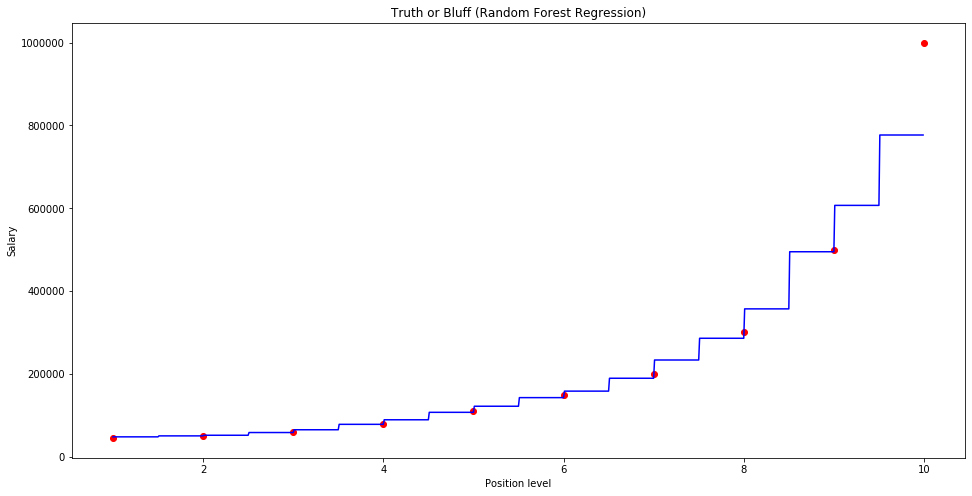

In [22]:
# Visualising the Random Forest Regression results (higher resolution)
fig = plt.figure(figsize=(16, 8))
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.title('Truth or Bluff (Random Forest Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()